PROJECT ONE (MODELLING)
IT COVERS THE FOLLOWING ASPECTS:

Data Cleaning and Preprocessing:
Clean the data to remove or impute missing values.
Standardize commodity names and units.
Ensure all prices are in a common currency (USD).

Exploratory Data Analysis:
Generate descriptive statistics.
Create visualizations to explore trends and patterns.

Time Series Analysis and Forecasting:
Decompose the time series data.
Train and evaluate forecasting models.

Clustering and Predictive Modeling:
Perform clustering to identify similar groups.
Build and evaluate regression models for price prediction.

Deployment:
Create a dashboard or web app for data visualization and interaction.

In [1]:
# importing the required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset
data = pd.read_csv("wfp_food_prices.csv")
data

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10643,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Sorghum,KG,aggregate,Retail,KES,90.0,0.6716
10644,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,cereals and tubers,Wheat flour,KG,aggregate,Retail,KES,120.0,0.8955
10645,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,miscellaneous food,Sugar,KG,aggregate,Retail,KES,200.0,1.4925
10646,2024-03-15,Rift Valley,Turkana,Mogadishu (Kakuma),3.71708,34.850333,pulses and nuts,Beans (dry),KG,aggregate,Retail,KES,200.0,1.4925


In [5]:
# Display the first few rows of the dataset
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
3,2006-01-15,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175


In [6]:
# Data Cleaning and Preprocessing
# Remove the first row which contains header information
data = data.iloc[1:]

In [7]:
# View the features
data.columns

Index(['date', 'admin1', 'admin2', 'market', 'latitude', 'longitude',
       'category', 'commodity', 'unit', 'priceflag', 'pricetype', 'currency',
       'price', 'usdprice'],
      dtype='object')

In [8]:
# Rename columns to remove special characters and make them more readable
data.columns = [
    "date", "admin1", "admin2", "market", "latitude", "longitude",
    "category", "commodity", "unit", "priceflag", "pricetype", 
    "currency", "price", "usdprice"
]

In [9]:
# Convert 'date' column to datetime format using the .loc method
data.loc[:, 'date'] = pd.to_datetime(data['date'])
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15 00:00:00,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15 00:00:00,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
3,2006-01-15 00:00:00,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15 00:00:00,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175
5,2006-01-15 00:00:00,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,KES,1800.0,24.9374


In [10]:
# Convert price columns to numeric
data.loc[:, 'price'] = pd.to_numeric(data['price'], errors='coerce')
data.loc[:, 'usdprice'] = pd.to_numeric(data['usdprice'], errors='coerce')

In [11]:
# Display basic information about the cleaned dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10647 entries, 1 to 10647
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       10647 non-null  object
 1   admin1     10647 non-null  object
 2   admin2     10647 non-null  object
 3   market     10647 non-null  object
 4   latitude   10647 non-null  object
 5   longitude  10647 non-null  object
 6   category   10647 non-null  object
 7   commodity  10647 non-null  object
 8   unit       10647 non-null  object
 9   priceflag  10647 non-null  object
 10  pricetype  10647 non-null  object
 11  currency   10647 non-null  object
 12  price      10647 non-null  object
 13  usdprice   10647 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [12]:
# Display the first few rows of the cleaned dataset
data.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2006-01-15 00:00:00,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,2006-01-15 00:00:00,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.0,20.5041
3,2006-01-15 00:00:00,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.0,44.9705
4,2006-01-15 00:00:00,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Potatoes (Irish),50 KG,actual,Wholesale,KES,1249.99,17.3175
5,2006-01-15 00:00:00,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Sorghum,90 KG,actual,Wholesale,KES,1800.0,24.9374


In [13]:
# Set the date column as the index
data.set_index('date', inplace=True)

C:\janet\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


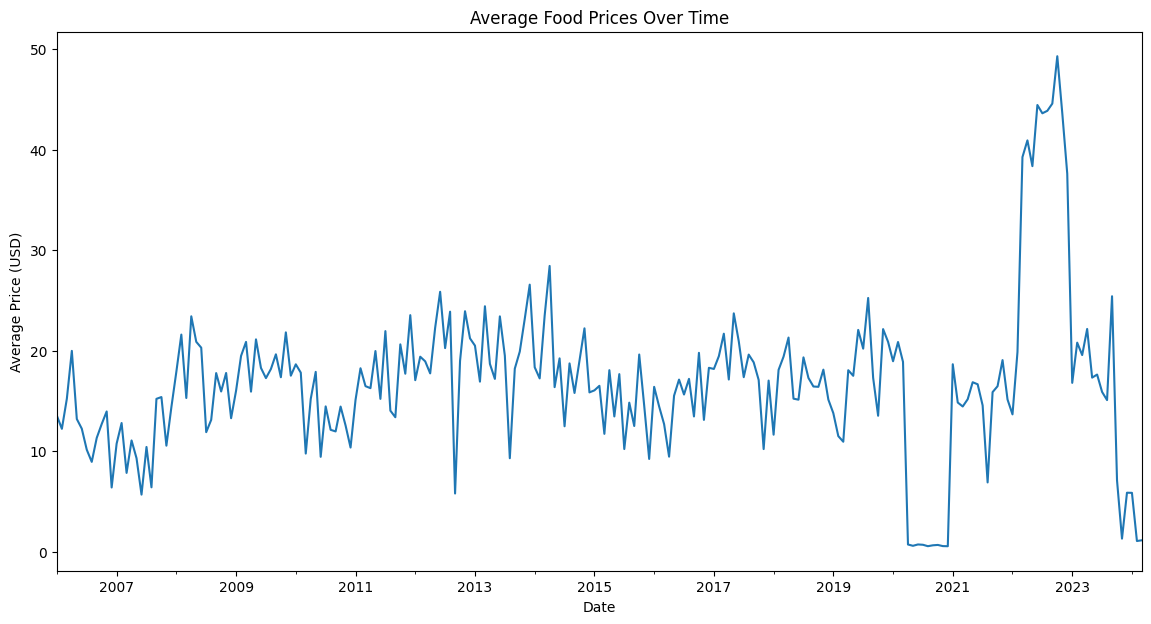

In [14]:
# Visualizing the overall trend in food prices over time
# prices fluctuations are influenced by seasonal patterns, market conditions, or external events such as policy changes or economic disruptions. 
plt.figure(figsize=(14, 7))
data['usdprice'].resample('ME').mean().plot()
plt.title('Average Food Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.show()

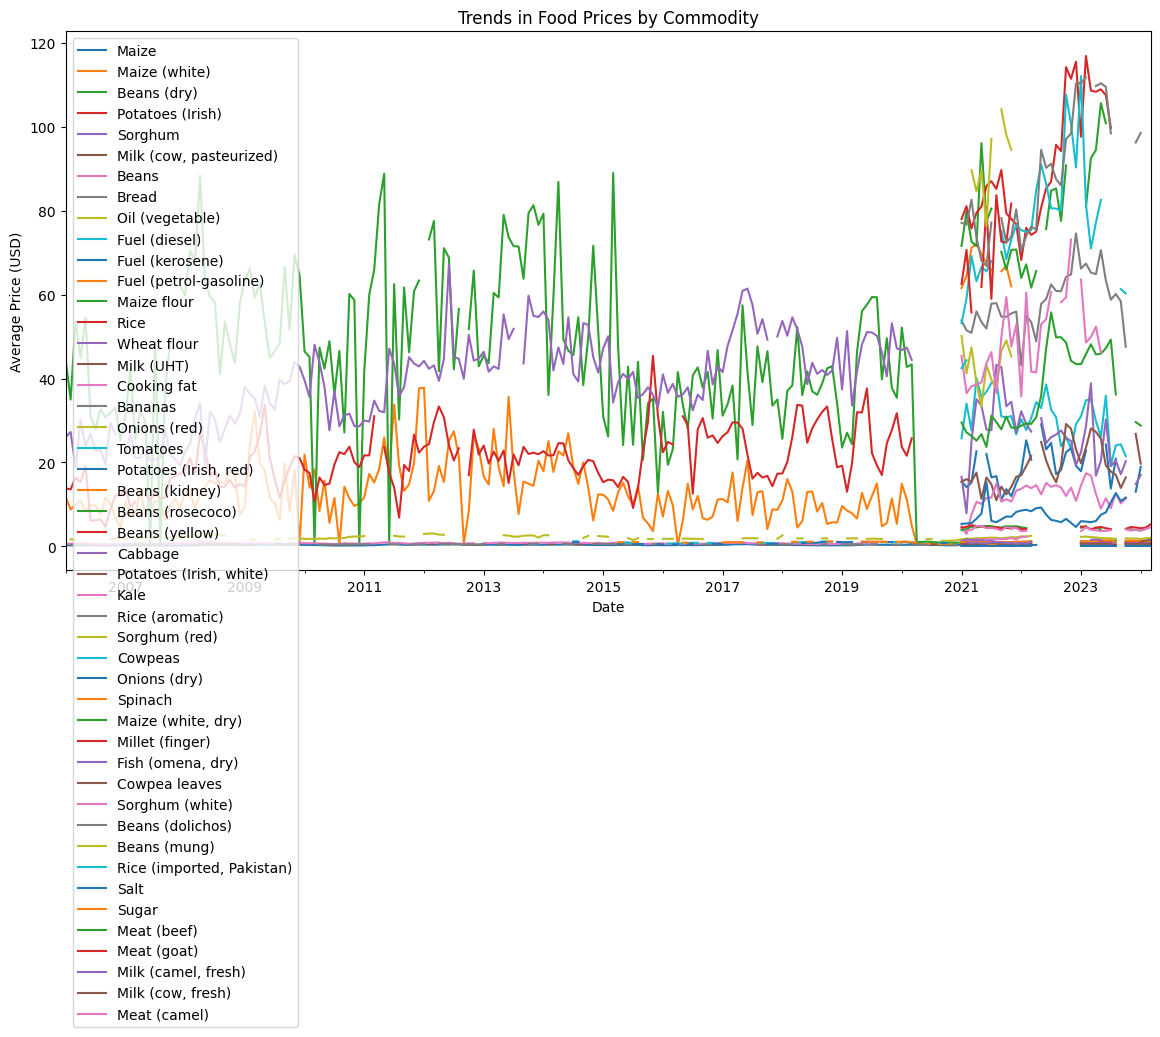

In [15]:
# Trend analysis for different commodities
# Some commodities show more volatility than others, which could point to their sensitivity to external factors.
plt.figure(figsize=(14, 7))
for commodity in data['commodity'].unique():
    data[data['commodity'] == commodity]['usdprice'].resample('ME').mean().plot(label=commodity)
plt.title('Trends in Food Prices by Commodity')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.legend()
plt.show()

GEOGRAPHICAL ANALYSIS

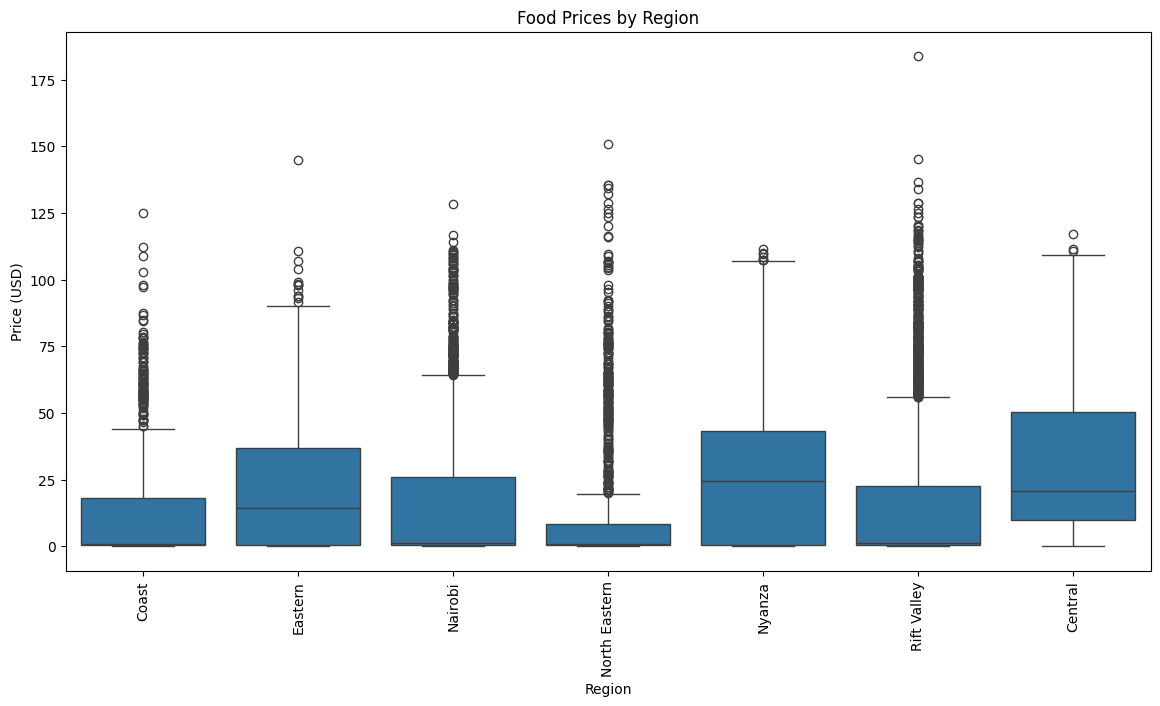

In [16]:
# Average prices by region (admin1)
# Certain regions consistently experience higher prices, which could be due to factors such as transportation costs, regional economic conditions,
# or supply chain inefficiencies.
plt.figure(figsize=(14, 7))
sns.boxplot(x='admin1', y='usdprice', data=data.reset_index())
plt.title('Food Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()

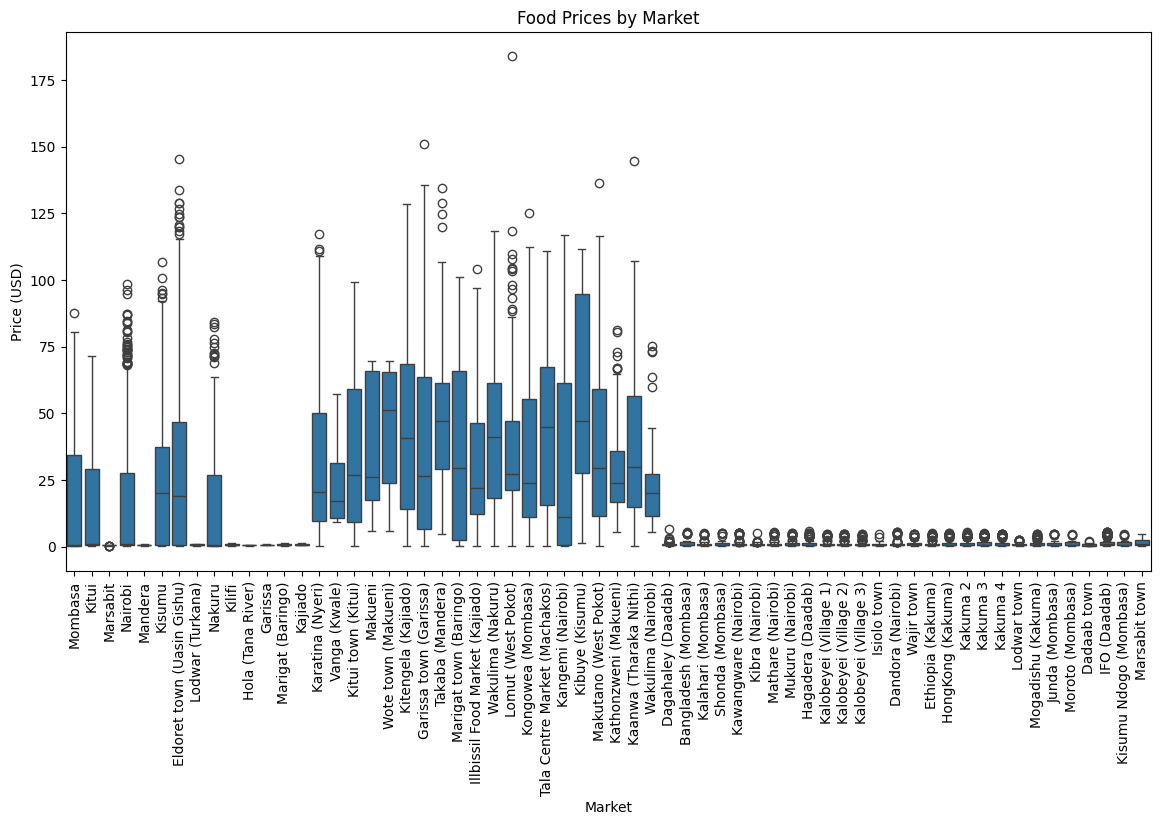

In [17]:
# Average prices by market
# Local market conditions play a crucial role in determining food prices due to factors like market size, competition levels,
# and availability of commodities.
plt.figure(figsize=(14, 7))
sns.boxplot(x='market', y='usdprice', data=data.reset_index())
plt.title('Food Prices by Market')
plt.xlabel('Market')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()

COMMODITY ANALYSIS

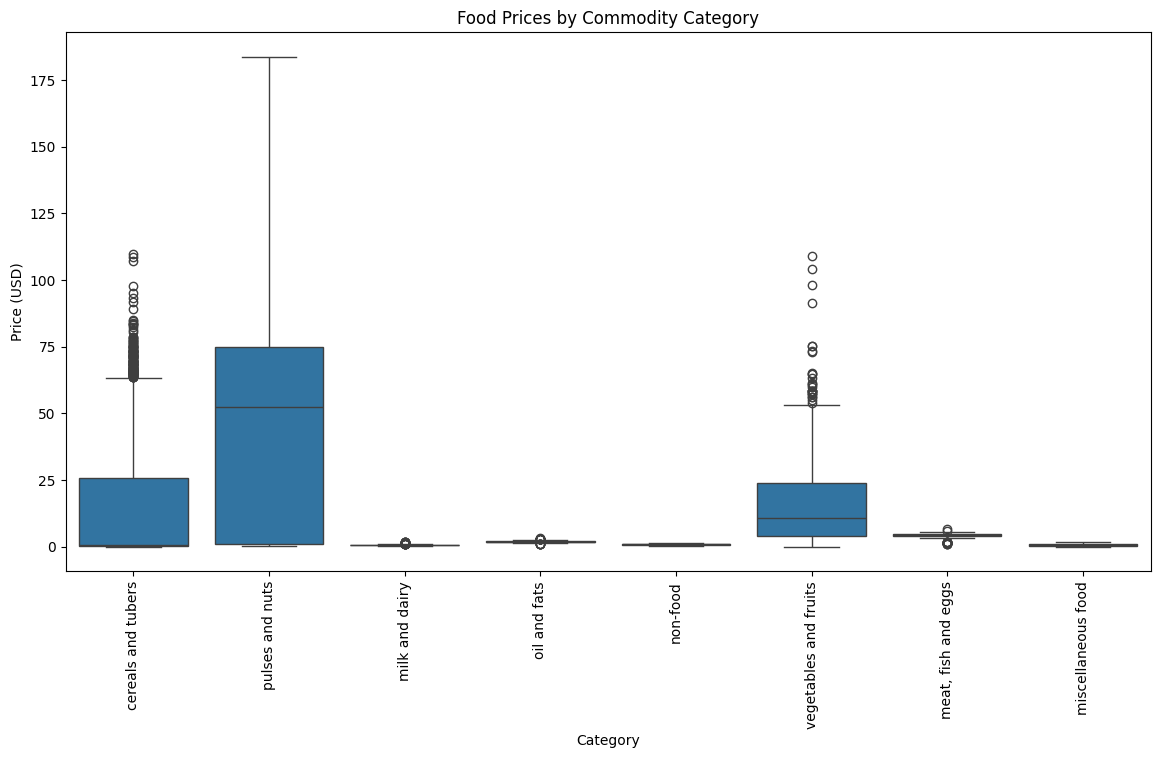

In [18]:
# Average prices by commodity category
# Commodity categories have distinct price ranges, with some categories generally being more expensive. This highlights the
# varying costs associated with producing and distributing various types of food.
plt.figure(figsize=(14, 7))
sns.boxplot(x='category', y='usdprice', data=data.reset_index())
plt.title('Food Prices by Commodity Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()

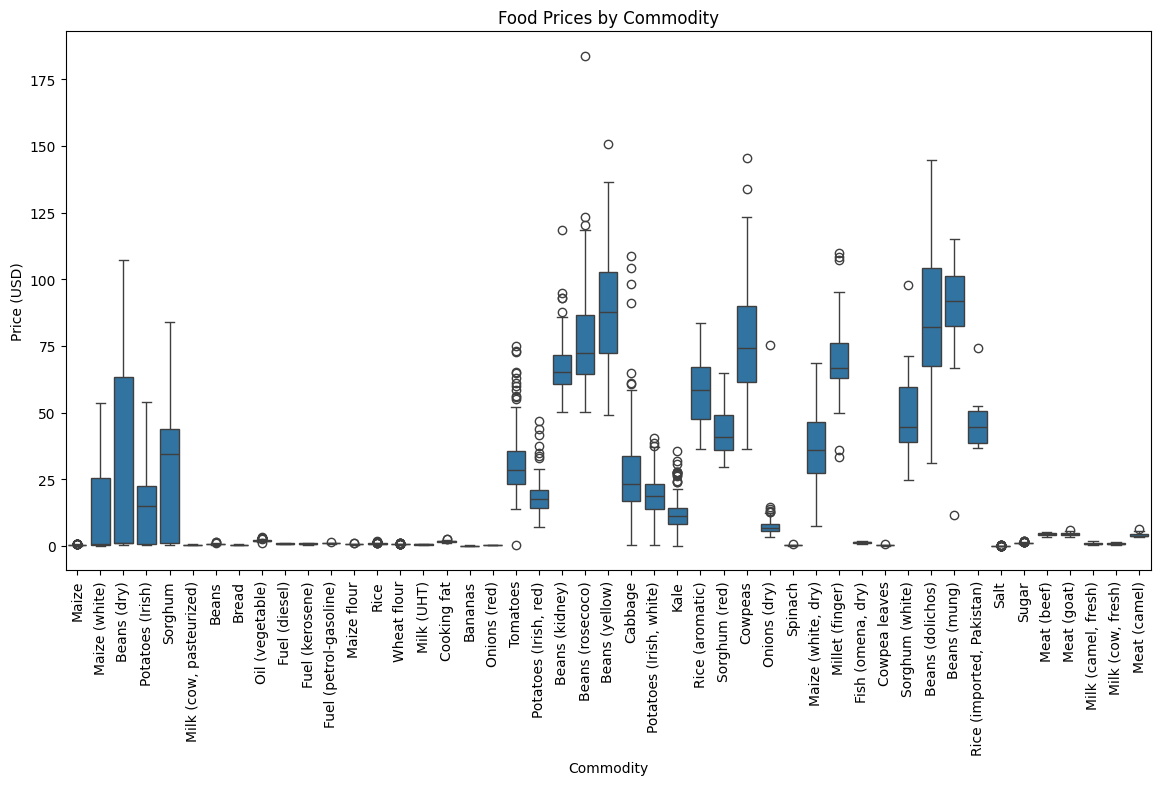

In [19]:
# Average prices by commodity
# individual commodities also show price variation, reflecting their specific supply-demand dynamics and production costs.
# Some commodities are consistently more expensive than others.
plt.figure(figsize=(14, 7))
sns.boxplot(x='commodity', y='usdprice', data=data.reset_index())
plt.title('Food Prices by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Price (USD)')
plt.xticks(rotation=90)
plt.show()

PRICE DISTRIBUTION

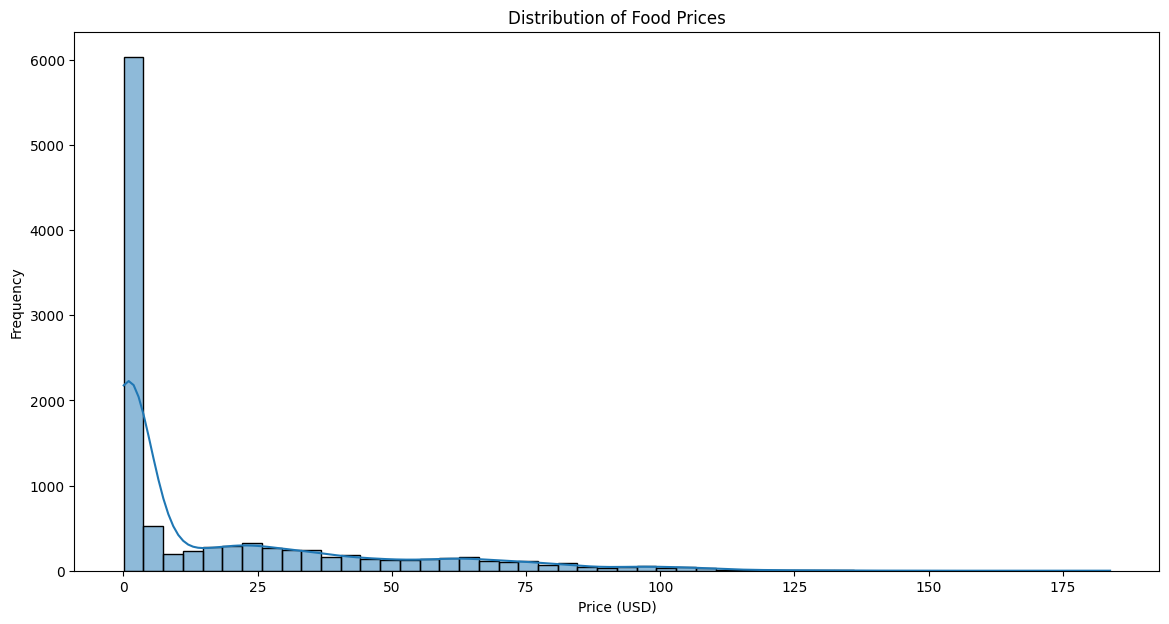

In [20]:
# Distribution of food prices
# Most food prices are clustered within a specific range, but there are outliers that suggest instances of extremely high or low prices.
# These outliers could be due to special market conditions or data anomalies.
plt.figure(figsize=(14, 7))
sns.histplot(data['usdprice'], bins=50, kde=True)
plt.title('Distribution of Food Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

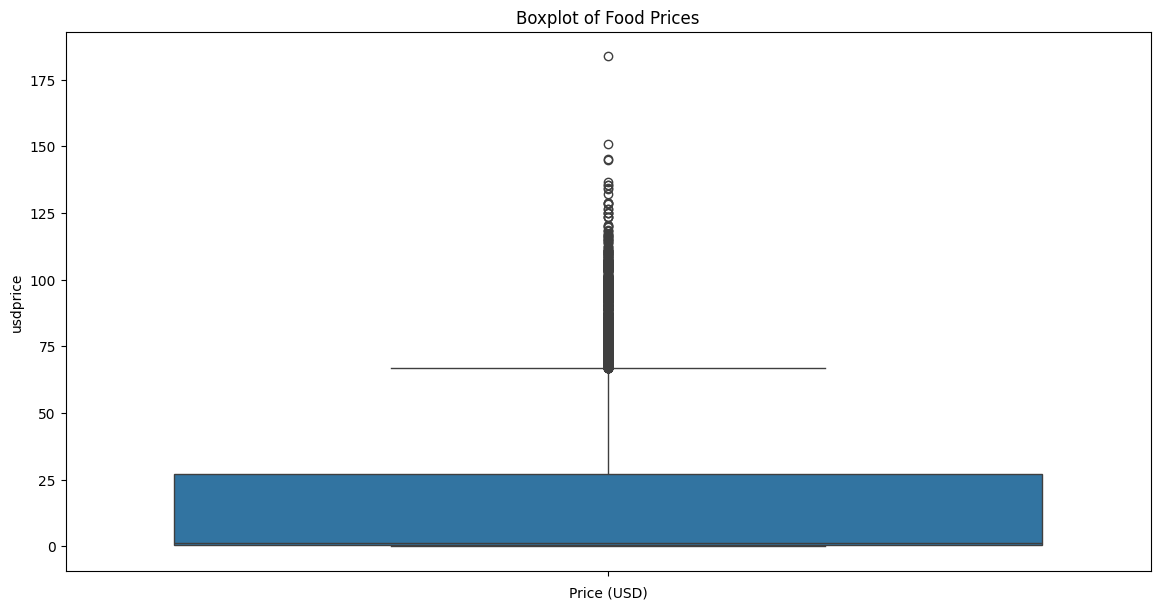

In [21]:
# We can use Boxplot to identify outliers
# The presence of outliers and the range of prices shown in the boxplot suggest significant variability in food prices. 
# This variability might be driven by external shocks, seasonal effects, or localized supply and demand imbalances.
plt.figure(figsize=(14, 7))
sns.boxplot(data['usdprice'])
plt.title('Boxplot of Food Prices')
plt.xlabel('Price (USD)')
plt.show()

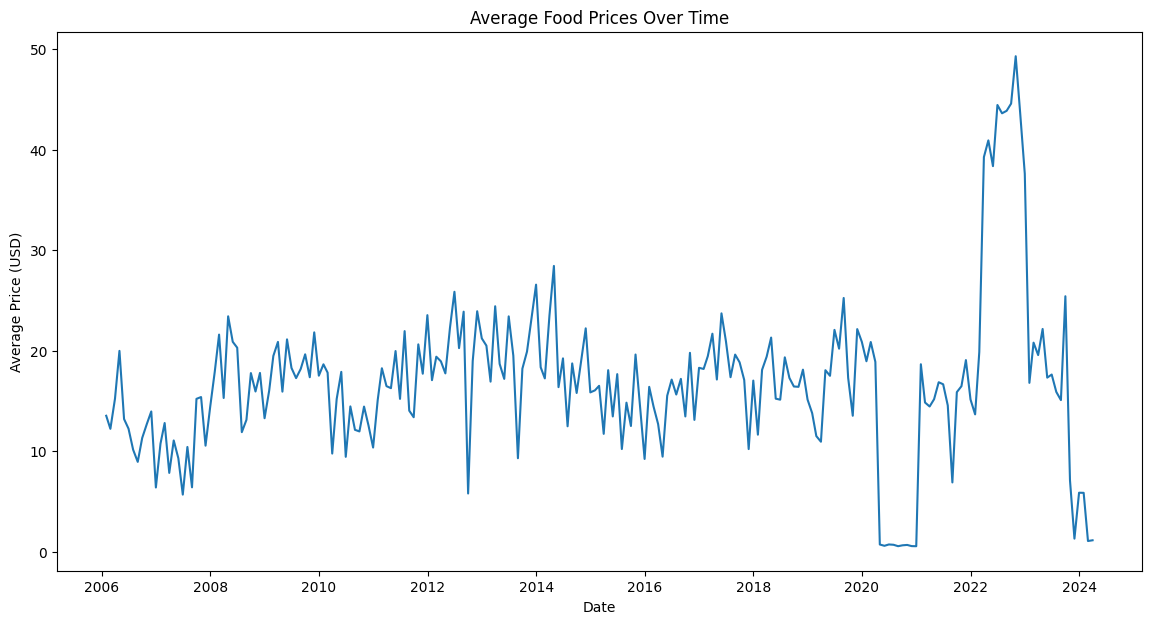

In [22]:
import matplotlib.pyplot as plt
# Resample the data to monthly frequency and plot
# prices fluctuations are influenced by seasonal patterns, market conditions, or external events such as policy changes or economic disruptions. 
monthly_data = data['usdprice'].resample('ME').mean()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data)
plt.title('Average Food Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (USD)')
plt.show()


In [48]:
# import the needed library to decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# Forward fill NaNs
data['usdprice'] = data['usdprice'].ffill()

# Drop any remaining NaNs
data = data.dropna(subset=['usdprice'])

# Check the data after processing
print(data.head())
print(data.info())

# Resample the data to monthly frequency and drop any NaNs that might result from resampling
monthly_data = data['usdprice'].resample('ME').mean().dropna()

# Check the resampled data
print(monthly_data.head())
print(monthly_data.info())

# Ensure there are enough observations for decomposition
if len(monthly_data) >= 24:
    # Decompose the time series data
    result = seasonal_decompose(monthly_data, model='additive', period=12)
    
    # Plot the decomposition
    plt.figure(figsize=(14, 10))
    result.plot()
    plt.show()
else:
    print("Not enough data for seasonal decomposition. Need at least 24 observations.")

Empty DataFrame
Columns: [admin1, admin2, market, latitude, longitude, category, commodity, unit, priceflag, pricetype, currency, price, usdprice]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   admin1     0 non-null      object
 1   admin2     0 non-null      object
 2   market     0 non-null      object
 3   latitude   0 non-null      object
 4   longitude  0 non-null      object
 5   category   0 non-null      object
 6   commodity  0 non-null      object
 7   unit       0 non-null      object
 8   priceflag  0 non-null      object
 9   pricetype  0 non-null      object
 10  currency   0 non-null      object
 11  price      0 non-null      object
 12  usdprice   0 non-null      object
dtypes: object(13)
memory usage: 0.0+ bytes
None
Series([], Freq: ME, Name: usdprice, dtype: object)
<class 'pandas.core.series.Series'>
DatetimeIndex: 0 entries


BUILDING FORECASTING MODELS